<a href="https://colab.research.google.com/github/Saherpathan/biomarker-detection/blob/main/BIOMARKERS_PROJECTs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [53]:
data = pd.read_csv('/content/Diff_genes_heatmap_IPF-CHP.csv')

In [54]:
data

,Regulation,Ensembl ID,log2 Fold Change,Adj.Pval,Symbol,Chr,Type,CHP_115,CHP_118,CHP_137,CHP_198,CHP_69,IPF_182,IPF_202,IPF_92
0,Up,ENSG00000258476,8.374366,5.980000e-10,LINC02207,15q26.2,lncRNA,2.438357,2.733715,3.269875,3.148150,3.615658,5.446368,12.085224,7.728616
1,Up,AC010980.1,8.364936,2.660000e-06,NaN,NANA,NaN,2.000000,2.000000,2.000000,2.000000,2.644363,4.786257,9.027967,5.503536
2,Up,ENSG00000204936,8.148562,2.880000e-11,CD177,19q13.31,protein_coding,5.451764,3.073724,3.527008,3.673254,5.023603,8.178167,13.700878,10.612025
3,Up,AL049651.1,8.016703,5.010000e-04,NaN,NANA,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,2.507224,7.264686,3.617437
4,Up,AC105265.3,7.897629,1.160000e-04,NaN,NANA,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,3.981556,7.048535,3.459481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,Down,ENSG00000183763,-1.310681,7.800000e-02,TRAIP,3p21.31,protein_coding,6.631631,6.369223,6.164857,6.606020,6.397946,5.389503,4.532585,5.543455
1654,Down,ENSG00000119640,-1.278135,9.600000e-02,ACYP1,14q24.3,protein_coding,7.752321,8.186182,8.198734,8.180271,7.616089,7.465470,6.205947,6.221881
1655,Down,ENSG00000105516,-1.204143,9.900000e-02,DBP,19q13.33,protein_coding,7.930861,7.469577,7.357195,8.260282,7.188722,6.595277,6.091482,6.801563
1656,Down,ENSG00000166851,-1.180103,9.190000e-02,PLK1,16p12.2,protein_coding,8.286292,8.216508,7.682017,8.353359,8.095465,6.805499,6.372072,7.539235


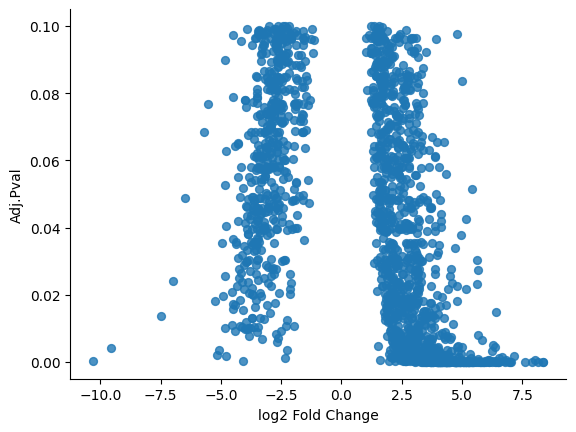

In [55]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='log2 Fold Change', y='Adj.Pval', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

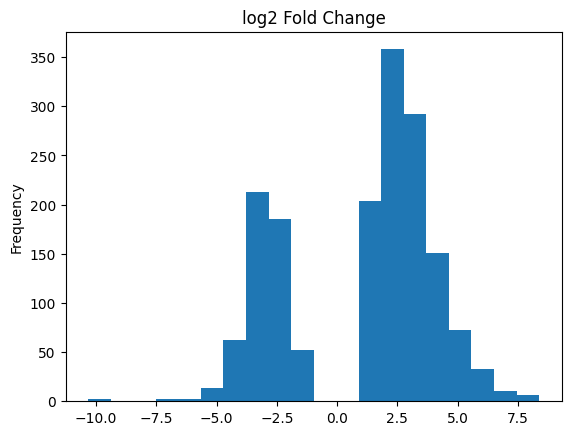

In [56]:
from matplotlib import pyplot as plt
data['log2 Fold Change'].plot(kind='hist', bins=20, title='log2 Fold Change')
plt.gca().spines[['top', 'right',]].set_visible(True)

In [57]:
#threshold_val is the measure of the statistical significance of the observed changes in gene expression
threshold_val = 0.1

significant_gene = data[data['Adj.Pval']<threshold_val]
significant_gene = significant_gene.sort_values(by='log2 Fold Change',ascending=False)
significant_gene['-log10(Adj.Pval)'] = -np.log10(significant_gene['Adj.Pval'])
top_contributing_genes = significant_gene.head(15)


In [58]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(significant_gene[['log2 Fold Change', '-log10(Adj.Pval)']])

In [59]:
significant_gene['Upregulated'] = np.where(significant_gene['log2 Fold Change']>0,1,0)

In [60]:
top_contributing_genes

,Regulation,Ensembl ID,log2 Fold Change,Adj.Pval,Symbol,Chr,Type,CHP_115,CHP_118,CHP_137,CHP_198,CHP_69,IPF_182,IPF_202,IPF_92,-log10(Adj.Pval)
0,Up,ENSG00000258476,8.374366,5.980000e-10,LINC02207,15q26.2,lncRNA,2.438357,2.733715,3.269875,3.148150,3.615658,5.446368,12.085224,7.728616,9.223299
1,Up,AC010980.1,8.364936,2.660000e-06,NaN,NANA,NaN,2.000000,2.000000,2.000000,2.000000,2.644363,4.786257,9.027967,5.503536,5.575118
2,Up,ENSG00000204936,8.148562,2.880000e-11,CD177,19q13.31,protein_coding,5.451764,3.073724,3.527008,3.673254,5.023603,8.178167,13.700878,10.612025,10.540608
3,Up,AL049651.1,8.016703,5.010000e-04,NaN,NANA,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,2.507224,7.264686,3.617437,3.300162
4,Up,AC105265.3,7.897629,1.160000e-04,NaN,NANA,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,3.981556,7.048535,3.459481,3.935542
5,Up,ENSG00000148795,7.626259,3.360000e-07,CYP17A1,10q24.32,protein_coding,2.000000,2.733715,2.000000,2.000000,2.459816,4.741515,8.799103,6.809770,6.473661
6,Up,ENSG00000196946,7.170994,1.630000e-03,ZNF705A,12p13.31,protein_coding,2.000000,2.000000,2.000000,2.000000,2.000000,2.881763,6.311994,3.826027,2.787812
7,Up,ENSG00000282607,7.029156,2.340000e-08,MGAM,CHR_HSCHR7_2_CTG6,protein_coding,6.672379,5.788308,5.725980,5.917339,7.323301,8.298882,14.885709,10.691901,7.630784
8,Up,AL157371.2,6.971150,8.080000e-05,NaN,NANA,NaN,2.000000,2.000000,2.000000,2.000000,2.248150,4.195712,6.352323,4.783809,4.092589
9,Up,AC091173.1,6.957488,1.060000e-05,NaN,NANA,NaN,2.000000,2.288030,2.956754,2.000000,2.248150,4.056530,8.180100,5.638672,4.974694


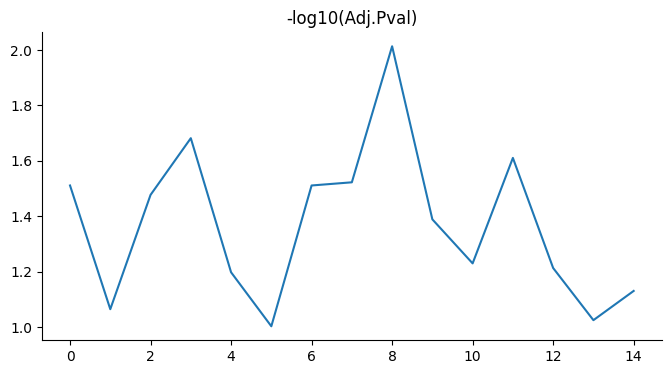

In [101]:
from matplotlib import pyplot as plt
top_contributing_genes['-log10(Adj.Pval)'].plot(kind='line', figsize=(8, 4), title='-log10(Adj.Pval)')
plt.gca().spines[['top', 'right']].set_visible(False)

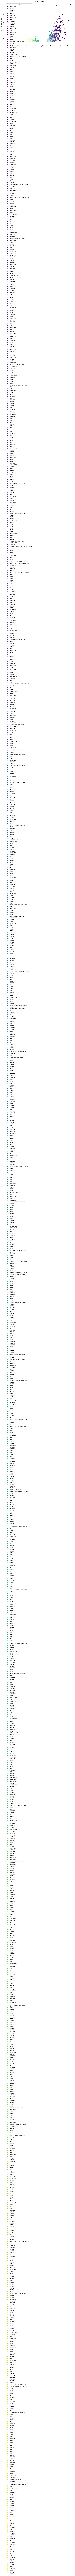

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log2 Fold Change', y='-log10(Adj.Pval)', data=significant_gene, hue='Symbol', palette='viridis')
plt.title('Volcano Plot')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10(Adjusted P-value)')
plt.show()

In [62]:
# features = ['log2 Fold Change','-log10(Adj.Pval)']
X = scaled_features
y = significant_gene['Upregulated']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
model = RandomForestClassifier(n_estimators=200,random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [63]:
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cls = classification_report(y_test,y_pred)

In [64]:
print("Accuracy: ", acc)

Accuracy:  1.0


In [65]:
print(cls)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       226

    accuracy                           1.00       332
   macro avg       1.00      1.00      1.00       332
weighted avg       1.00      1.00      1.00       332



In [66]:
print("Confusion matrix: ")

Confusion matrix: 


In [67]:
cm

array([[106,   0],
       [  0, 226]])

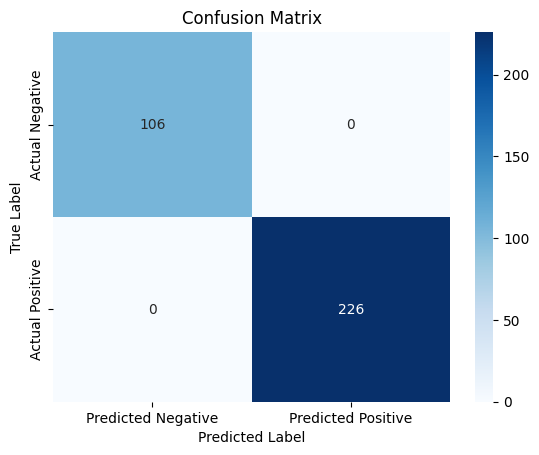

In [68]:
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [69]:
feature_importance = model.feature_importances_
print("Feature Importance:")
print(dict(zip(['log2 Fold Change', '-log10(Adj.Pval)'], feature_importance)))


Feature Importance:
{'log2 Fold Change': 0.903948207617045, '-log10(Adj.Pval)': 0.09605179238295505}


In [70]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data=pd.read_csv("/content/NSIP v CHP gene list.csv")




In [71]:
# Cluster Analysis
X = data[['log2 Fold Change', 'Adj.Pval']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


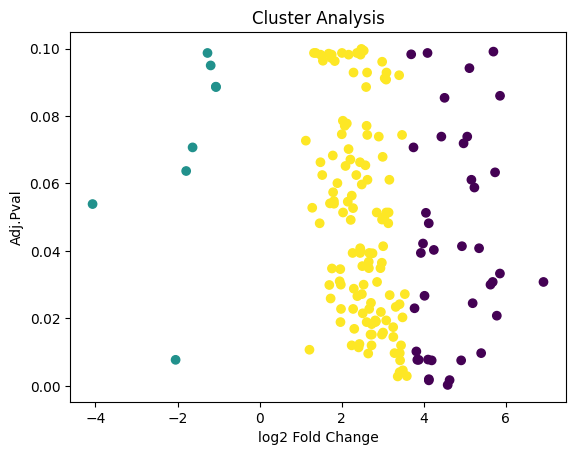

In [72]:
# Visualization of Clusters
plt.scatter(X['log2 Fold Change'], X['Adj.Pval'], c=data['Cluster'], cmap='viridis')
plt.xlabel('log2 Fold Change')
plt.ylabel('Adj.Pval')
plt.title('Cluster Analysis')
plt.show()


In [73]:

# Biomarker Selection
significant_biomarkers = data[(np.abs(data['log2 Fold Change']) > 2) & (data['Adj.Pval'] < 0.05)]

In [74]:
# Print significant biomarkers
print("Significant Biomarkers:")
print(significant_biomarkers)

Significant Biomarkers:
      Symbol  log2 Fold Change  Adj.Pval  Cluster
0      MUC3A          6.917722   0.03080        0
2      TRPM8          5.856526   0.03330        0
3      MUC17          5.780382   0.02080        0
6    ANKRD33          5.680745   0.03080        0
7    ZNF705A          5.626413   0.03000        0
..       ...               ...       ...      ...
118    CXCR4          2.279645   0.02280        2
120   CSRNP1          2.266562   0.03940        2
122    PNRC1          2.243627   0.01200        2
123   CHST15          2.221147   0.04920        2
164   IL20RB         -2.046351   0.00771        1

[82 rows x 4 columns]


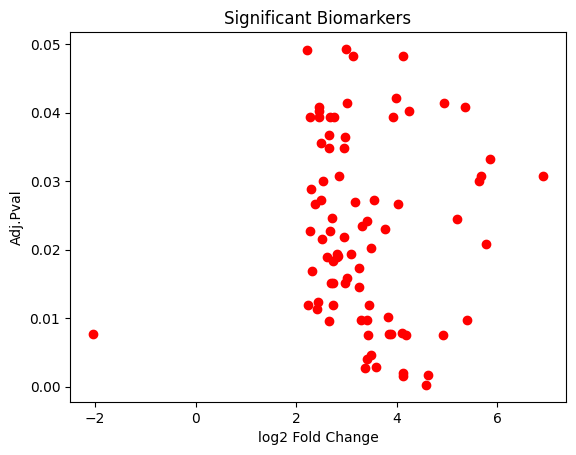

In [75]:
# Visualization of significant biomarkers
plt.scatter(significant_biomarkers['log2 Fold Change'], significant_biomarkers['Adj.Pval'], c='red')
plt.xlabel('log2 Fold Change')
plt.ylabel('Adj.Pval')
plt.title('Significant Biomarkers')
plt.show()

In [76]:
from sklearn.metrics import silhouette_score

In [77]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Average Silhouette Score for Clustering:", silhouette_avg)

# Biomarker Selection
significant_biomarkers = data[(np.abs(data['log2 Fold Change']) > 2) & (data['Adj.Pval'] < 0.05)]

# Print significant biomarkers
print("Significant Biomarkers:")
print(significant_biomarkers)

Average Silhouette Score for Clustering: 0.6431770791638228
Significant Biomarkers:
      Symbol  log2 Fold Change  Adj.Pval  Cluster
0      MUC3A          6.917722   0.03080        0
2      TRPM8          5.856526   0.03330        0
3      MUC17          5.780382   0.02080        0
6    ANKRD33          5.680745   0.03080        0
7    ZNF705A          5.626413   0.03000        0
..       ...               ...       ...      ...
118    CXCR4          2.279645   0.02280        2
120   CSRNP1          2.266562   0.03940        2
122    PNRC1          2.243627   0.01200        2
123   CHST15          2.221147   0.04920        2
164   IL20RB         -2.046351   0.00771        1

[82 rows x 4 columns]


In [78]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
# Define threshold for statistical significance
threshold_val = 0.1

# Filter significant genes based on p-value threshold
significant_gene = data[data['Adj.Pval'] < threshold_val]

# Prepare features and target
X = significant_gene[['log2 Fold Change', 'Adj.Pval']]
y = np.where(significant_gene['log2 Fold Change'] > 0, 1, 0)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [80]:
# Train Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [81]:
# Predict on the test set
y_pred = svm_classifier.predict(X_test)

In [82]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [83]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)


Confusion matrix:
[[ 1  0]
 [ 0 34]]


In [84]:
cls_report = classification_report(y_test, y_pred)
print("Classification report:")
print(cls_report)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        34

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [85]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (replace 'your_dataset.csv' with your actual file)
data = pd.read_csv('/content/NSIP v CHP gene list.csv')

In [86]:
threshold_val = 0.1

significant_gene = data[data['Adj.Pval']<threshold_val]
significant_gene = significant_gene.sort_values(by='log2 Fold Change',ascending=False)
significant_gene['-log10(Adj.Pval)'] = -np.log10(significant_gene['Adj.Pval'])
top_contributing_genes = significant_gene.head(15)

In [87]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(significant_gene[['log2 Fold Change', '-log10(Adj.Pval)']])

In [88]:
significant_gene['Upregulated'] = np.where(significant_gene['log2 Fold Change']>0,1,0)

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
data = pd.read_csv('/content/NSIP v CHP gene list.csv')

# Prepare features (X) and labels (y)
X = data[['log2 Fold Change', 'Adj.Pval']]
y = data['Symbol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train K-means clustering model on the training data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_train = kmeans.fit_predict(X_train)

# Predict clusters for the testing data
clusters_test = kmeans.predict(X_test)

# Evaluate clustering performance on training data
silhouette_avg_train = silhouette_score(X_train, clusters_train)
print(f"Silhouette Score (Training): {silhouette_avg_train}")

# Evaluate clustering performance on testing data
silhouette_avg_test = silhouette_score(X_test, clusters_test)
print(f"Silhouette Score (Testing): {silhouette_avg_test}")

# Add cluster labels to the datasets
X_train['Cluster'] = clusters_train
X_test['Cluster'] = clusters_test



Silhouette Score (Training): 0.637374797961361
Silhouette Score (Testing): 0.6376103157849925


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [90]:
potential_biomarkers_train = {}
for cluster_id in range(kmeans.n_clusters):
    cluster_indices_train = X_train[X_train['Cluster'] == cluster_id].index
    cluster_genes_train = data.loc[cluster_indices_train, 'Symbol'].tolist()
    potential_biomarkers_train[cluster_id] = cluster_genes_train

# Print potential biomarkers for each cluster in training data
for cluster_id, genes in potential_biomarkers_train.items():
    print(f'Cluster {cluster_id} (Training): Potential Biomarkers')
    print(genes)
    print()

Cluster 0 (Training): Potential Biomarkers
['RGS2', 'CD177', 'DAAM2', 'SNAI1', 'IRAG1', 'OLFML2B', 'VNN1', 'RBKS', 'EHD1', 'ST6GALNAC3', 'ALDOC', 'KCNJ15', 'NAMPT', 'THSD7A', 'SLC7A11', 'UPB1', 'TNFAIP6', 'PRLR', 'DGAT2', 'PHOSPHO1', 'MGAM', 'IL36RN', 'UBE2D1', 'CHST15', 'CXCR4', 'PLIN5', 'CSRNP1', 'DUSP15', 'SYN1', 'SULT1B1', 'CCR7', 'HCAR2', 'TG', 'CXCL1', 'TNFRSF8', 'CXCR2', 'VNN3', 'CEACAM3', 'SLC25A37', 'ZFP36', 'CA4', 'MXD1', 'PFKFB3', 'IFITM2', 'IL1B', 'ITGAD', 'FPR2', 'SRGN', 'CORIN', 'CFP', 'PNRC1', 'IER3', 'LRG1', 'IRAK2', 'LIN7A', 'LEP', 'RPH3A', 'BTNL8', 'TNFRSF10C', 'LINC02218', 'OSM', 'MBOAT7', 'VNN2', 'FFAR2', 'BMP6', 'RGS18', 'SLC43A2', 'IL1R2', 'NALCN', 'CD55', 'PLTP', 'SELL', 'SECTM1', 'PNPLA1', 'S1PR1', 'GHRL', 'JCHAIN', 'FCGR3B', 'PRDM8', 'G0S2', 'TREML4', 'LYVE1', 'ADM', 'S100A12', 'NFKBIA', 'NOCT', 'CACNA1E', 'FLT3', 'MT1G', 'LPCAT1', 'CRISPLD2', 'EPHB1', 'LILRA2', 'CSF3R', 'SLC26A4', 'NLRP6', 'RAB3C', 'TREML2', 'EGR3', 'TNFRSF1B']

Cluster 1 (Training): Potential

In [91]:
# Identify potential biomarkers within each cluster for testing data
potential_biomarkers_test = {}
for cluster_id in range(kmeans.n_clusters):
    cluster_indices_test = X_test[X_test['Cluster'] == cluster_id].index
    cluster_genes_test = data.loc[cluster_indices_test, 'Symbol'].tolist()
    potential_biomarkers_test[cluster_id] = cluster_genes_test

# Print potential biomarkers for each cluster in testing data
for cluster_id, genes in potential_biomarkers_test.items():
    print(f'Cluster {cluster_id} (Testing): Potential Biomarkers')
    print(genes)
    print()


Cluster 0 (Testing): Potential Biomarkers
['SEMA6B', 'CCL20', 'ORM1', 'SERPING1', 'ADGRA2', 'CCNJL', 'AOC1', 'HPN', 'CCRL2', 'DNAH17', 'GPR160', 'AREG', 'HCAR3', 'ADGRG3', 'OPRK1', 'KCNAB1', 'FAP', 'MMP25', 'FPR1', 'AFF2', 'SLCO4A1', 'PIM2', 'CYP19A1', 'CMTM2']

Cluster 1 (Testing): Potential Biomarkers
['LRRC7', 'CD300LD', 'PI3', 'CXCR1', 'PROK2', 'STAB2', 'CXCL8', 'BMP10', 'BTNL3', 'NECAB2']

Cluster 2 (Testing): Potential Biomarkers
['AGAP9']



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


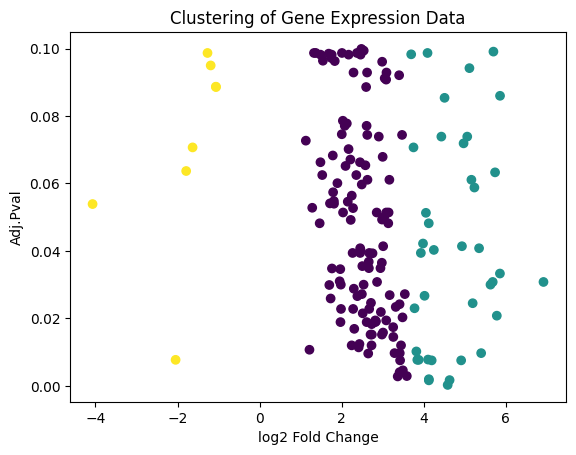

Cluster 0: Potential Biomarkers
39         CXCR2
40          CCR7
41          MGAM
42         DAAM2
43     LINC02218
         ...    
158        LIN7A
159        ALDOC
160       UBE2D1
161         NOCT
162       GPR160
Name: Symbol, Length: 124, dtype: object

Cluster 1: Potential Biomarkers
0       MUC3A
1        GYPA
2       TRPM8
3       MUC17
4        DPP6
5        RHAG
6     ANKRD33
7     ZNF705A
8        HAS1
9       BTNL3
10      KCNK9
11     DMRTC2
12      BMP10
13      IGFN1
14      DMBX1
15      LRRC7
16      STAB2
17    CYP17A1
18      CXCL8
19      PROK2
20      OOSP3
21      SEMG1
22      TEX45
23      NRXN1
24      CXCR1
25      PTGS2
26     GABRA4
27       SEZ6
28       CASR
29    CD300LD
30        PI3
31     NECAB2
32      HTRA3
33       FCAR
34      TKTL1
35      SSTR3
36      FFAR1
37     SLC8A3
38      UNC5C
Name: Symbol, dtype: object

Cluster 2: Potential Biomarkers
163    MTRNR2L8
164      IL20RB
165        TGM1
166      CAPNS2
167       AGAP9
168      ZNF418
169 

In [92]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = data[['log2 Fold Change', 'Adj.Pval']]
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
data['Cluster'] = clusters
# Visualize clusters
plt.scatter(X['log2 Fold Change'], X['Adj.Pval'], c=clusters, cmap='viridis')
plt.xlabel('log2 Fold Change')
plt.ylabel('Adj.Pval')
plt.title('Clustering of Gene Expression Data')
plt.show()
potential_biomarkers = {}
for cluster_id in range(kmeans.n_clusters):
    cluster_genes = data[data['Cluster'] == cluster_id]['Symbol']
    potential_biomarkers[cluster_id] = cluster_genes
for cluster_id, genes in potential_biomarkers.items():
    print(f'Cluster {cluster_id}: Potential Biomarkers')
    print(genes)
    print()


In [93]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluate silhouette score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate Davies-Bouldin index
db_index = davies_bouldin_score(X, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Evaluate Calinski-Harabasz index
ch_index = calinski_harabasz_score(X, clusters)
print(f"Calinski-Harabasz Index: {ch_index}")


Silhouette Score: 0.6431770791638228
Davies-Bouldin Index: 0.44182258523945667
Calinski-Harabasz Index: 361.9536598360967


In [94]:
X = scaled_features
y = significant_gene['Upregulated']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


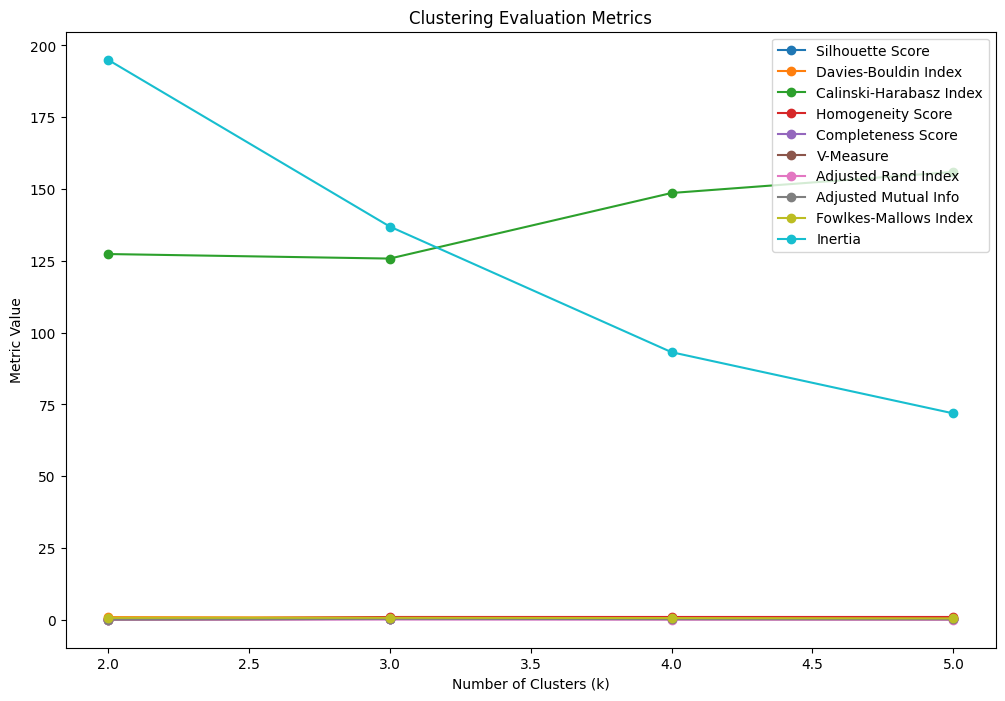

In [95]:
# Apply Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn import metrics
pca = PCA(n_components=2)
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

X_pca = pca.fit_transform(X_scaled)

# K-means clustering
k_values = range(2, 6)
metrics_dict = {'Silhouette Score': [], 'Davies-Bouldin Index': [], 'Calinski-Harabasz Index': [],
                'Homogeneity Score': [], 'Completeness Score': [], 'V-Measure': [],
                'Adjusted Rand Index': [], 'Adjusted Mutual Info': [], 'Fowlkes-Mallows Index': [],
                'Inertia': []}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)
    metrics_dict['Silhouette Score'].append(silhouette_avg)

    # Davies-Bouldin Index
    db_index = davies_bouldin_score(X_scaled, labels)
    metrics_dict['Davies-Bouldin Index'].append(db_index)

    # Calinski-Harabasz Index
    ch_index = calinski_harabasz_score(X_scaled, labels)
    metrics_dict['Calinski-Harabasz Index'].append(ch_index)

    # Homogeneity Score
    homogeneity = metrics.homogeneity_score(y, labels)
    metrics_dict['Homogeneity Score'].append(homogeneity)

    # Completeness Score
    completeness = metrics.completeness_score(y, labels)
    metrics_dict['Completeness Score'].append(completeness)

    # V-Measure
    v_measure = metrics.v_measure_score(y, labels)
    metrics_dict['V-Measure'].append(v_measure)

    # Adjusted Rand Index
    ari = metrics.adjusted_rand_score(y, labels)
    metrics_dict['Adjusted Rand Index'].append(ari)

    # Adjusted Mutual Information
    ami = metrics.adjusted_mutual_info_score(y, labels)
    metrics_dict['Adjusted Mutual Info'].append(ami)

    # Fowlkes-Mallows Index
    fm_index = metrics.fowlkes_mallows_score(y, labels)
    metrics_dict['Fowlkes-Mallows Index'].append(fm_index)

    # Inertia (within-cluster sum of squares)
    inertia = kmeans.inertia_
    metrics_dict['Inertia'].append(inertia)

# Visualize metrics for different k values
plt.figure(figsize=(12, 8))
for metric_name, values in metrics_dict.items():
    plt.plot(k_values, values, marker='o', label=metric_name)

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Metric Value')
plt.title('Clustering Evaluation Metrics')
plt.legend()
plt.show()

In [96]:
data_filtered = data[data['Adj.Pval'] < 0.05]
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data_filtered['cluster'] = kmeans.fit_predict(data_filtered[['log2 Fold Change', 'Adj.Pval']])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-96-76b82b008717>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['cluster'] = kmeans.fit_predict(data_filtered[['log2 Fold Change', 'Adj.Pval']])


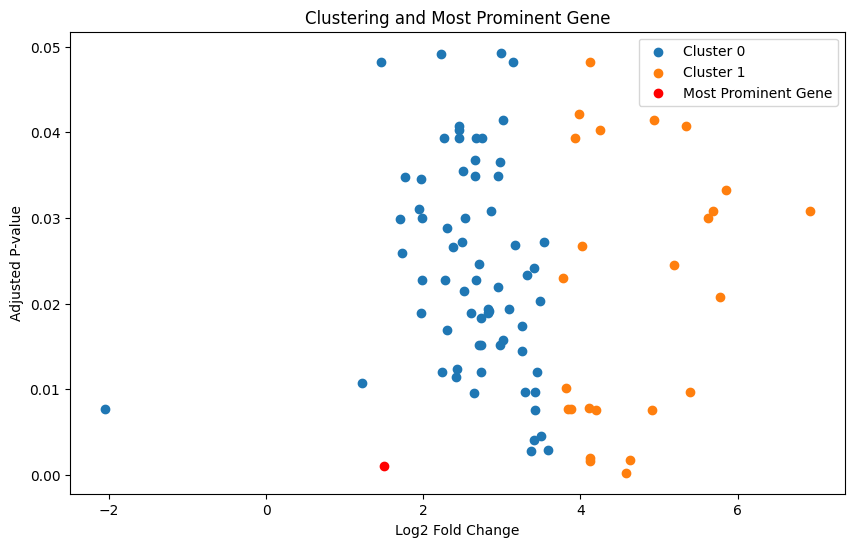

In [97]:
most_prominent_gene = pd.DataFrame({'log2 Fold Change': [1.5], 'Adj.Pval': [0.001]})
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = data_filtered[data_filtered['cluster'] == cluster_id]
    plt.scatter(cluster_data['log2 Fold Change'], cluster_data['Adj.Pval'], label=f'Cluster {cluster_id}')

# Plot the most prominent gene
plt.scatter(most_prominent_gene['log2 Fold Change'], most_prominent_gene['Adj.Pval'], color='red', label='Most Prominent Gene')

plt.xlabel('Log2 Fold Change')
plt.ylabel('Adjusted P-value')
plt.title('Clustering and Most Prominent Gene')
plt.legend()
plt.show()

In [98]:
prominent_genes = []
for cluster_id in range(num_clusters):
    cluster_data = data_filtered[data_filtered['cluster'] == cluster_id]
    most_prominent_gene = cluster_data.loc[cluster_data['Adj.Pval'].idxmin()]
    prominent_genes.append(most_prominent_gene)

# Select the most significant gene among the identified prominent genes
most_prominent_gene = min(prominent_genes, key=lambda x: x['Adj.Pval'])

print("Most Prominent Gene:")
print(most_prominent_gene)

Most Prominent Gene:
Symbol                 PROK2
log2 Fold Change    4.583502
Adj.Pval             0.00027
Cluster                    1
cluster                    1
Name: 19, dtype: object


In [102]:
prominent_genes

[Symbol                  G0S2
 log2 Fold Change    3.365725
 Adj.Pval             0.00279
 Cluster                    0
 cluster                    0
 Name: 50, dtype: object,
 Symbol                 PROK2
 log2 Fold Change    4.583502
 Adj.Pval             0.00027
 Cluster                    1
 cluster                    1
 Name: 19, dtype: object]